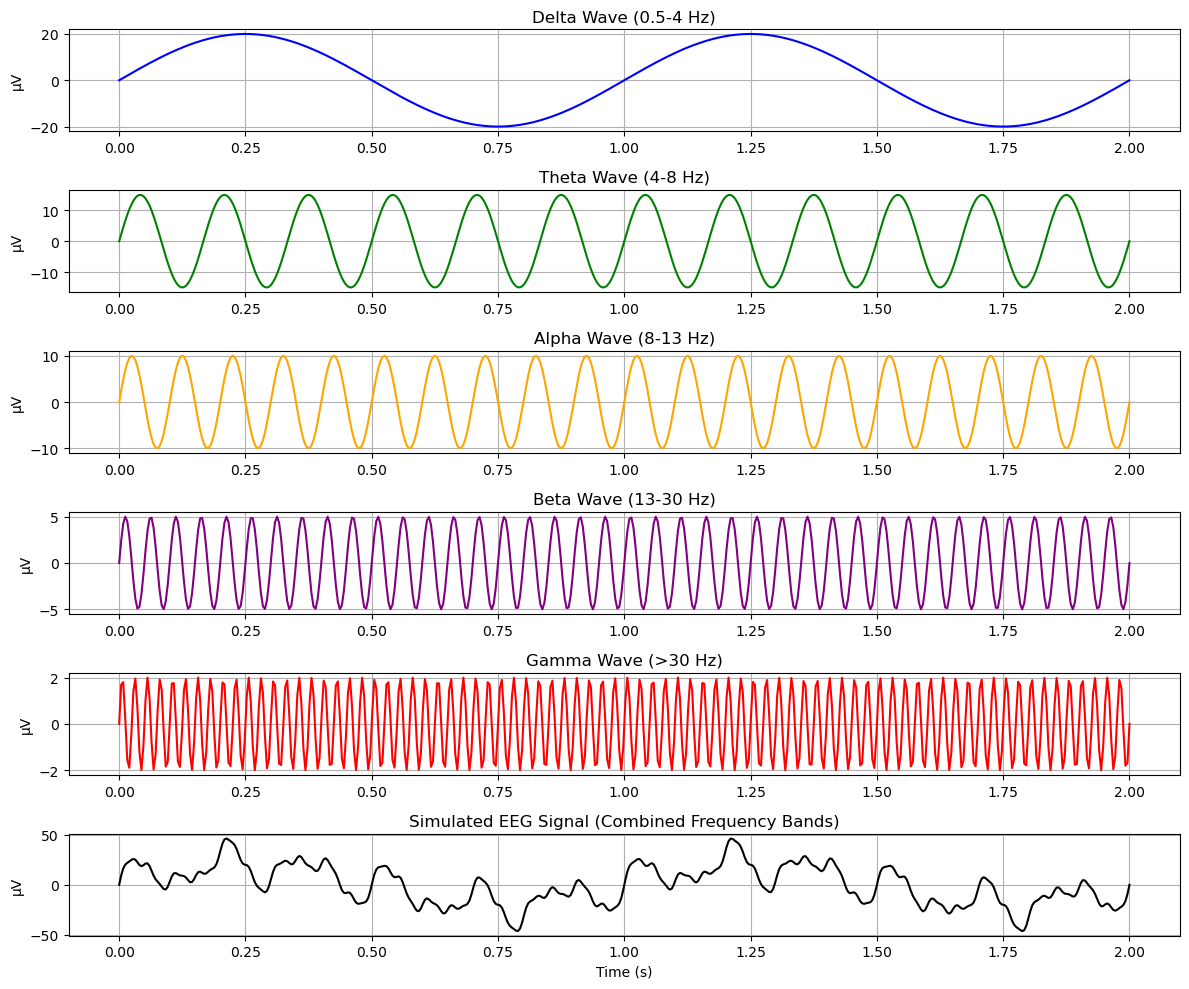

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Sampling rate and time
fs = 250  # Hz, typical EEG sampling frequency
t = np.linspace(0, 2, fs * 2)  # 2 seconds of data

# Generate example signals in different EEG frequency bands
delta_wave = 20 * np.sin(2 * np.pi * 1 * t)  # Delta (0.5-4 Hz)
theta_wave = 15 * np.sin(2 * np.pi * 6 * t)  # Theta (4-8 Hz)
alpha_wave = 10 * np.sin(2 * np.pi * 10 * t)  # Alpha (8-13 Hz)
beta_wave = 5 * np.sin(2 * np.pi * 20 * t)    # Beta (13-30 Hz)
gamma_wave = 2 * np.sin(2 * np.pi * 40 * t)   # Gamma (>30 Hz)

# Combine all waves into a simulated EEG signal
eeg_signal = delta_wave + theta_wave + alpha_wave + beta_wave + gamma_wave

# Plotting the EEG signal and its components
plt.figure(figsize=(12, 10))

# Plot individual frequency bands
plt.subplot(6, 1, 1)
plt.plot(t, delta_wave, label='Delta (0.5-4 Hz)', color='blue')
plt.ylabel("µV")
plt.title("Delta Wave (0.5-4 Hz)")
plt.grid(True)

plt.subplot(6, 1, 2)
plt.plot(t, theta_wave, label='Theta (4-8 Hz)', color='green')
plt.ylabel("µV")
plt.title("Theta Wave (4-8 Hz)")
plt.grid(True)

plt.subplot(6, 1, 3)
plt.plot(t, alpha_wave, label='Alpha (8-13 Hz)', color='orange')
plt.ylabel("µV")
plt.title("Alpha Wave (8-13 Hz)")
plt.grid(True)

plt.subplot(6, 1, 4)
plt.plot(t, beta_wave, label='Beta (13-30 Hz)', color='purple')
plt.ylabel("µV")
plt.title("Beta Wave (13-30 Hz)")
plt.grid(True)

plt.subplot(6, 1, 5)
plt.plot(t, gamma_wave, label='Gamma (>30 Hz)', color='red')
plt.ylabel("µV")
plt.title("Gamma Wave (>30 Hz)")
plt.grid(True)

# Plot the combined EEG signal
plt.subplot(6, 1, 6)
plt.plot(t, eeg_signal, label='EEG Signal (Combined)', color='black')
plt.xlabel("Time (s)")
plt.ylabel("µV")
plt.title("Simulated EEG Signal (Combined Frequency Bands)")
plt.grid(True)

plt.tight_layout()
plt.show()

Here is a simulated EEG signal showing different frequency bands:

	1.	Delta Wave (0.5-4 Hz): Low frequency, often associated with deep sleep.
	2.	Theta Wave (4-8 Hz): Associated with relaxation and drowsiness.
	3.	Alpha Wave (8-13 Hz): Seen during relaxed wakefulness, often with eyes closed.
	4.	Beta Wave (13-30 Hz): Linked to active thinking and focus.
	5.	Gamma Wave (>30 Hz): High frequency, associated with high-level cognitive processing.

The last plot shows the combined EEG signal, which is a mixture of all these frequency bands, similar to a typical EEG recording. This combination allows neuroscientists and clinicians to analyze and interpret brain activity associated with different mental states

1.	Signal Transformation:
    - Fourier Transform (FT): The Fourier Transform converts time-domain data (the EEG signal over time) into frequency-domain data, which shows how much of each frequency is present in the signal.
    - Fast Fourier Transform (FFT): This is an efficient version of the Fourier Transform often used with EEG data to quickly analyze frequency components.
	- Wavelet Transform: Wavelet analysis is another method used for EEG data because it can provide frequency information while also preserving some time information, making it useful for non-stationary signals like EEG, where brain wave patterns can change quickly.
3.	Identification of Frequency Bands:
	- By applying these transformations, neuroscientists get a power spectrum of the EEG signal, which shows the power (or intensity) of different frequencies.
	- They can then isolate specific ranges in this spectrum corresponding to delta, theta, alpha, beta, and gamma waves.

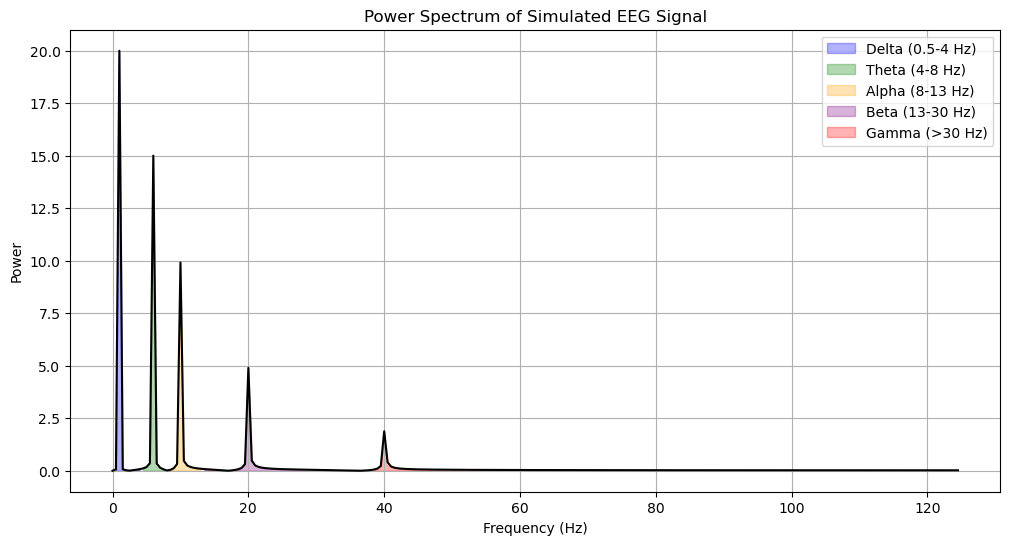

In [2]:
from scipy.fft import fft, fftfreq
import pandas as pd

# Perform Fast Fourier Transform (FFT) on the combined EEG signal
N = len(eeg_signal)            # Number of sample points
T = 1.0 / fs                   # Sampling interval
fft_result = fft(eeg_signal)   # FFT result (complex numbers)
fft_freqs = fftfreq(N, T)      # Corresponding frequency bins

# Take only the positive frequencies and normalize power
positive_freqs = fft_freqs[:N // 2]
power_spectrum = (2.0 / N) * np.abs(fft_result[:N // 2])  # Power of each frequency

# Plotting the Power Spectrum
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, power_spectrum, color='black')
plt.title("Power Spectrum of Simulated EEG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid(True)

# Highlighting the frequency bands
# Delta (0.5-4 Hz)
plt.fill_between(positive_freqs, power_spectrum, where=(positive_freqs >= 0.5) & (positive_freqs <= 4),
                 color='blue', alpha=0.3, label='Delta (0.5-4 Hz)')
# Theta (4-8 Hz)
plt.fill_between(positive_freqs, power_spectrum, where=(positive_freqs > 4) & (positive_freqs <= 8),
                 color='green', alpha=0.3, label='Theta (4-8 Hz)')
# Alpha (8-13 Hz)
plt.fill_between(positive_freqs, power_spectrum, where=(positive_freqs > 8) & (positive_freqs <= 13),
                 color='orange', alpha=0.3, label='Alpha (8-13 Hz)')
# Beta (13-30 Hz)
plt.fill_between(positive_freqs, power_spectrum, where=(positive_freqs > 13) & (positive_freqs <= 30),
                 color='purple', alpha=0.3, label='Beta (13-30 Hz)')
# Gamma (>30 Hz)
plt.fill_between(positive_freqs, power_spectrum, where=(positive_freqs > 30),
                 color='red', alpha=0.3, label='Gamma (>30 Hz)')

plt.legend(loc="upper right")
plt.show()

This plot shows the power spectrum of the simulated EEG signal, obtained by applying the Fast Fourier Transform (FFT) to the combined EEG data.

In this spectrum:

	- The x-axis represents frequency in Hertz (Hz).
	- The y-axis represents the power, showing how strong each frequency component is within the signal.

Specific EEG frequency bands are highlighted:

	- Delta (0.5-4 Hz) in blue.
	- Theta (4-8 Hz) in green.
	- Alpha (8-13 Hz) in orange.
	- Beta (13-30 Hz) in purple.
	- Gamma (>30 Hz) in red.

By analyzing the power within these frequency bands, neuroscientists can determine which cognitive states or brain activities are predominant. For example, higher power in the alpha range might indicate a relaxed state, while increased gamma power could be associated with high cognitive processing. This approach is a common method in EEG analysis to isolate and interpret brain activity patterns across different frequencies.

Why Power Decreases with Frequency increases?

In EEG, power generally decreases as frequency increases. This is because low-frequency waves (like delta and theta) involve more synchronized activity across larger brain areas, resulting in higher amplitude and power. Conversely, higher-frequency waves (like gamma) involve rapid, localized, and less synchronized neural activity, leading to lower amplitude and power. This trend is typical in EEG signals, reflecting the different ways that neurons coordinate across various mental states.

    - Low frequencies are often associated with basic regulatory functions, which require widespread communication across the brain (e.g., maintaining sleep, general alertness, or relaxed wakefulness).
	- Higher frequencies, like beta and gamma, are involved in specific, high-level cognitive tasks, such as attention, learning, and sensory processing. These tasks require precise, fast information processing in localized areas rather than broad, synchronized activity, leading to less cumulative power in these bands.

In essence, low-frequency waves represent large-scale, synchronized brain rhythms across extensive regions, while high-frequency waves reflect faster, localized processes with less synchrony across the brain. This difference in spatial and temporal synchrony is the main reason why low-frequency bands exhibit higher power than high-frequency bands in EEG data.

144 Matching Events Found and Used to Create Epochs

    - Out of the 320 total events detected in the recording, only 144 events match the specific event IDs of interest defined earlier in the analysis (e.g., IDs that might represent specific stimuli).
	- These 144 events are used to create epochs. Each epoch is a snippet of data, starting a few milliseconds before each event and ending some milliseconds after the event. This captures the brain’s response around the time the event occurs.

For example, if an experiment shows a visual stimulus (like an image) to a participant, an epoch might capture the brain’s activity 200 ms before and 800 ms after the stimulus presentation.
